# Brain MRI Data basic concepts overview

### 1. 3D Voxel data
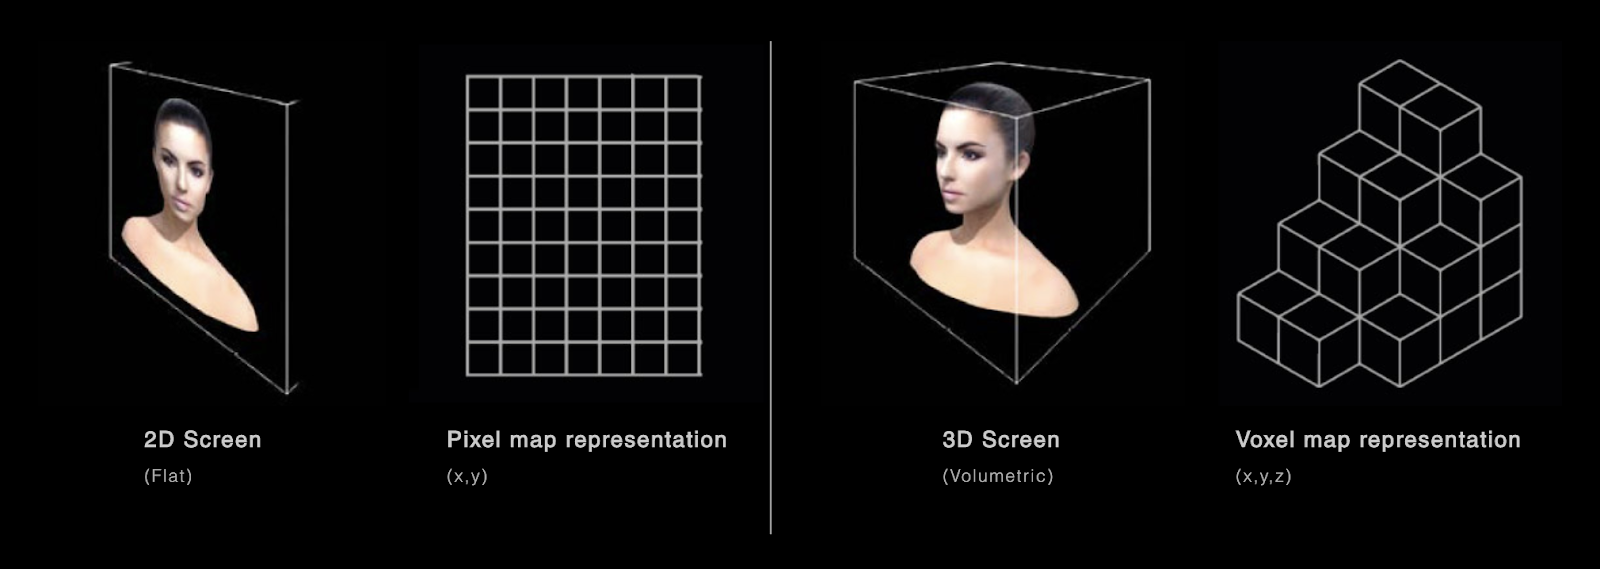
- https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.linkedin.com%2Fpulse%2Ffrom-pixel-voxel-dimensional-leap-danilo-grande&psig=AOvVaw2bjSyWGVMSQM0hOIW3V1Jm&ust=1706693350769000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCLDhqK3mhIQDFQAAAAAdAAAAABAf

### 2. NIfTI (Neuroimaging Informatics Technology Initiative)
- 주로 brain MRI 및 다른 brain imaging data를 저장하기 위한 형식
- 간단하고 사용하기 쉬운 텍스트 및 바이너리 형식으로 데이터를 저장
- 이미지 데이터와 헤더 정보를 포함하며, 이미지의 차원, 공간 해상도, 방향 등의 정보를 포함
- NIfTI 파일의 일반적인 확장자: ".nii" 또는 ".nii.gz" (압축된 형식)

### 3. MRI related python libraries
1. `ANTsPy` (Advanced Normalization Tools for Python)
    - ANTsr (Advanced Normalization Tools)의 파이썬 버전으로, 뇌 MRI 데이터 처리 및 분석에 사용
    - package installation: ```pip install antspyx```
2. `SimpleITK` (Simplified Image Processing in ITK)
    - Insight Segmentation and Registration Toolkit (ITK)의 간소화된 인터페이스를 제공하며, 뇌 MRI 데이터의 이미지 처리 및 분석에 사용
    - package installation: ```conda install SimpleITK -c conda-forge```
3. `NiBabel` (Neuroimaging Babel)
    - 다양한 뇌 이미지 형식 (NIfTI, Analyze 등)을 처리하기 위한 라이브러리로, 뇌 MRI 데이터를 읽고 쓰는 데 사용
4. `nilearn`
    - 뇌 이미지 분석 및 시각화에 사용되는 라이브러리로, 뇌 MRI 데이터의 분석 및 시각화 작업을 단순화
5. `PyDicom`
    - DICOM 형식의 뇌 MRI 데이터를 읽고 처리하는 데 사용되는 라이브러리
  

### 4. Materials based on the following sources:
- YouTube: https://www.youtube.com/playlist?list=PLI3eIHxETjX4a5NMmgayg3wuM232fYIxy
- GitHub: https://github.com/Angeluz-07/MRI-preprocessing-techniques?tab=readme-ov-file

# UKBB Brain MRI image

In [2]:
import os
import glob
from tqdm import tqdm

import pandas as pd
import ants
import SimpleITK as sitk
from helpers import *

print(f'AntsPy version = {ants.__version__}')
print(f'SimpleITK version = {sitk.__version__}')

AntsPy version = 0.4.2
SimpleITK version = 2.3.1


In [3]:
# lab storage 내 UKB Brain MRI data 기본 경로
root = '/media/leelabsg-storage1/DATA/UKBB/bulk/20252_uz'

# Dataset size
data = glob.glob(f'{root}/*')
print(len(data))

41184


In [4]:
# sample) subject id = 5048198
sample_id = 5048198
sample_path = f'/media/leelabsg-storage1/DATA/UKBB/bulk/20252_uz/{str(sample_id)}_20252_2_0/T1/'

### AntsPy

#### data information and visualization

In [5]:
imgs_ants = {
    "T1_orig_defaced": os.path.join(sample_path, 'T1_orig_defaced.nii.gz'),
    "T1": os.path.join(sample_path, 'T1.nii.gz'),
    "T1_brain_mask": os.path.join(sample_path, 'T1_brain_mask.nii.gz'),
    "T1_brain": os.path.join(sample_path, 'T1_brain.nii.gz'),
    "T1_brain_to_MNI": os.path.join(sample_path, 'T1_brain_to_MNI.nii.gz')
}

### Orientation
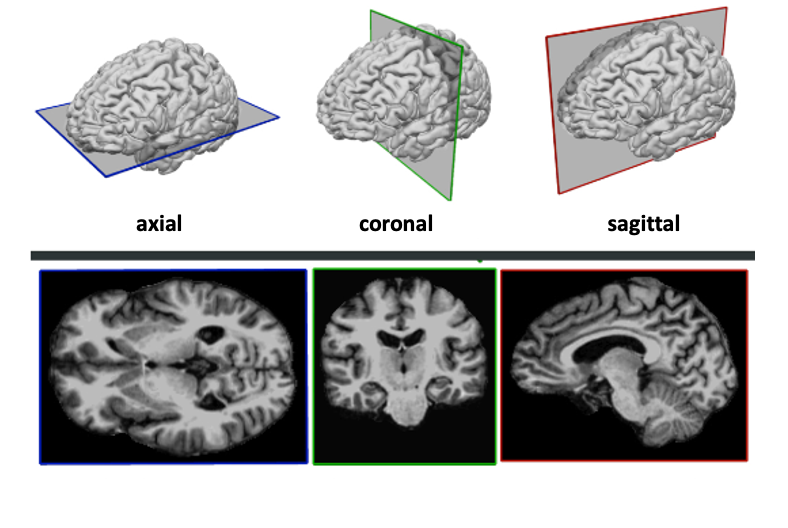
- `axial`: superior-to-inferior or inferior-to-superior
- `coronal`: anterior-to-posterior or posterior-to-anterior 
- `sagittal`: left-to-right or right-to-left
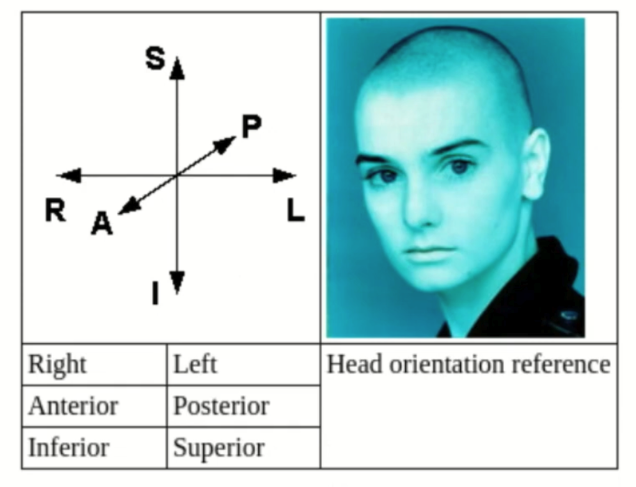

In [6]:
for file, img in imgs_ants.items():
    print('='*20, file, '='*20)
    print(img)
    img_ants = ants.image_read(img) # load the mri image with antspy
    print(img_ants) # print out the image information
                        # Orientation: LPI = Left-to-right, Posterior-to-anterior, Inferior-to-superior
    img_np = img_ants.numpy() # convert the image into numpy array
    explore_3D_array(img_np) # visualization

==================== T1_orig_defaced ====================
/media/leelabsg-storage1/DATA/UKBB/bulk/20252_uz/5048198_20252_2_0/T1/T1_orig_defaced.nii.gz
ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (208, 256, 256)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (131.8253, 158.0167, -129.2562)
	 Direction  : [-0.9865 -0.1196 -0.1121  0.1446 -0.9572 -0.2507 -0.0773 -0.2635  0.9616]



interactive(children=(IntSlider(value=103, description='SLICE', max=207), Output()), _dom_classes=('widget-int…

==================== T1 ====================
/media/leelabsg-storage1/DATA/UKBB/bulk/20252_uz/5048198_20252_2_0/T1/T1.nii.gz
ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (166, 228, 199)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (104.7193, 146.7648, -76.0711)
	 Direction  : [-0.9865 -0.1196 -0.1121  0.1446 -0.9572 -0.2507 -0.0773 -0.2635  0.9616]



interactive(children=(IntSlider(value=82, description='SLICE', max=165), Output()), _dom_classes=('widget-inte…

==================== T1_brain_mask ====================
/media/leelabsg-storage1/DATA/UKBB/bulk/20252_uz/5048198_20252_2_0/T1/T1_brain_mask.nii.gz
ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (166, 228, 199)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (104.7193, 146.7648, -76.0711)
	 Direction  : [-0.9865 -0.1196 -0.1121  0.1446 -0.9572 -0.2507 -0.0773 -0.2635  0.9616]



interactive(children=(IntSlider(value=82, description='SLICE', max=165), Output()), _dom_classes=('widget-inte…

==================== T1_brain ====================
/media/leelabsg-storage1/DATA/UKBB/bulk/20252_uz/5048198_20252_2_0/T1/T1_brain.nii.gz
ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (166, 228, 199)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (104.7193, 146.7648, -76.0711)
	 Direction  : [-0.9865 -0.1196 -0.1121  0.1446 -0.9572 -0.2507 -0.0773 -0.2635  0.9616]



interactive(children=(IntSlider(value=82, description='SLICE', max=165), Output()), _dom_classes=('widget-inte…

==================== T1_brain_to_MNI ====================
/media/leelabsg-storage1/DATA/UKBB/bulk/20252_uz/5048198_20252_2_0/T1/T1_brain_to_MNI.nii.gz
ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-90.0, 126.0, -72.0)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]



interactive(children=(IntSlider(value=90, description='SLICE', max=181), Output()), _dom_classes=('widget-inte…

In [7]:
# Reorientation 

for file, img in imgs_ants.items():
    print('='*20, file, '='*20)
    print(img)
    img_ants = ants.image_read(img, reorient='IAL') # reorientation
                                                    # IAL = Inferior-to-superior, Anterior-to-posterior, Left-to-right
    print(img_ants)
    img_np = img_ants.numpy()
    explore_3D_array(img_np)

==================== T1_orig_defaced ====================
/media/leelabsg-storage1/DATA/UKBB/bulk/20252_uz/5048198_20252_2_0/T1/T1_orig_defaced.nii.gz
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 208)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (101.3166, -86.0732, -196.445)
	 Direction  : [-0.1121  0.1196 -0.9865 -0.2507  0.9572  0.1446  0.9616  0.2635 -0.0773]



interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

==================== T1 ====================
/media/leelabsg-storage1/DATA/UKBB/bulk/20252_uz/5048198_20252_2_0/T1/T1.nii.gz
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (199, 228, 166)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (77.5606, -70.5231, -135.8822)
	 Direction  : [-0.1121  0.1196 -0.9865 -0.2507  0.9572  0.1446  0.9616  0.2635 -0.0773]



interactive(children=(IntSlider(value=99, description='SLICE', max=198), Output()), _dom_classes=('widget-inte…

==================== T1_brain_mask ====================
/media/leelabsg-storage1/DATA/UKBB/bulk/20252_uz/5048198_20252_2_0/T1/T1_brain_mask.nii.gz
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (199, 228, 166)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (77.5606, -70.5231, -135.8822)
	 Direction  : [-0.1121  0.1196 -0.9865 -0.2507  0.9572  0.1446  0.9616  0.2635 -0.0773]



interactive(children=(IntSlider(value=99, description='SLICE', max=198), Output()), _dom_classes=('widget-inte…

==================== T1_brain ====================
/media/leelabsg-storage1/DATA/UKBB/bulk/20252_uz/5048198_20252_2_0/T1/T1_brain.nii.gz
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (199, 228, 166)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (77.5606, -70.5231, -135.8822)
	 Direction  : [-0.1121  0.1196 -0.9865 -0.2507  0.9572  0.1446  0.9616  0.2635 -0.0773]



interactive(children=(IntSlider(value=99, description='SLICE', max=198), Output()), _dom_classes=('widget-inte…

==================== T1_brain_to_MNI ====================
/media/leelabsg-storage1/DATA/UKBB/bulk/20252_uz/5048198_20252_2_0/T1/T1_brain_to_MNI.nii.gz
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (91.0, -91.0, -72.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



interactive(children=(IntSlider(value=90, description='SLICE', max=181), Output()), _dom_classes=('widget-inte…

# Registration with Templates
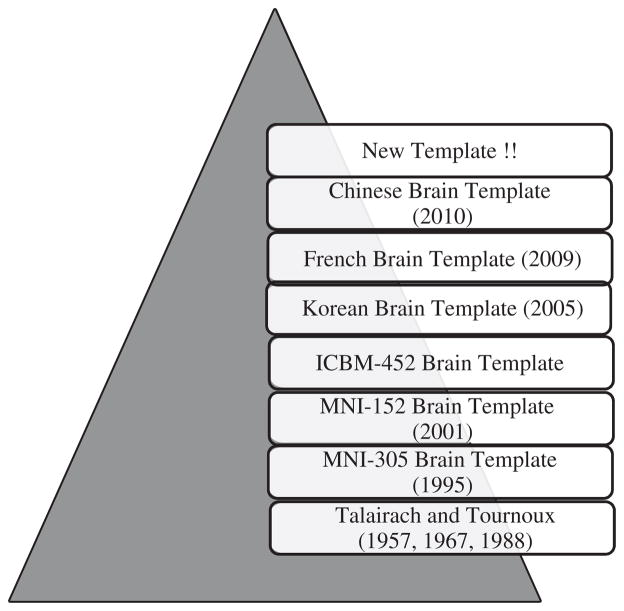

In [8]:
template_img_path = '/media/leelabsg-storage1/yein/research/data/template/MNI152_T1_1mm_brain.nii.gz'
template_img_ants = ants.image_read(template_img_path, reorient='IAL')

explore_3D_array(template_img_ants.numpy()) 

interactive(children=(IntSlider(value=90, description='SLICE', max=181), Output()), _dom_classes=('widget-inte…

In [9]:
print('\t\tRAW IMG')
raw_img_path = '/media/leelabsg-storage1/DATA/UKBB/bulk/20252_uz/5048198_20252_2_0/T1/T1_brain.nii.gz'
raw_img_ants = ants.image_read(raw_img_path, reorient='IAL')
print(raw_img_ants)

print('\t\tTEMPLATE IMG')
print(template_img_ants)

		RAW IMG
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (199, 228, 166)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (77.5606, -70.5231, -135.8822)
	 Direction  : [-0.1121  0.1196 -0.9865 -0.2507  0.9572  0.1446  0.9616  0.2635 -0.0773]

		TEMPLATE IMG
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (91.0, -91.0, -72.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



### Registration
- 다양한 이미지 간에 일치하는 공간 좌표를 만들기 위해 사용
- 이미지 간의 정확한 비교나 통합을 위해 필요

In [10]:
transformation = ants.registration(
    fixed=template_img_ants, # fixed에 template을 넣기
    moving=raw_img_ants, # moving parameter에 raw image 넣기
    type_of_transform='SyN', # 'SyN' 대부분의 경우에 잘 작동하는 parameter 값, 필요에 따라 변경 가능
    verbose=False # True 했을 떄 
)

registered_img_ants = transformation['warpedmovout'] # Fixed image warped to space of moving image

print('\t\tRAW IMG')
print(raw_img_ants)
explore_3D_array(raw_img_ants.numpy())

print('\t\Registered IMG')
print(registered_img_ants) # Dimensions와 Spacing 등이 template에 맞춰진 것 확인
explore_3D_array(registered_img_ants.numpy())

		RAW IMG
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (199, 228, 166)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (77.5606, -70.5231, -135.8822)
	 Direction  : [-0.1121  0.1196 -0.9865 -0.2507  0.9572  0.1446  0.9616  0.2635 -0.0773]



interactive(children=(IntSlider(value=99, description='SLICE', max=198), Output()), _dom_classes=('widget-inte…

	\Registered IMG
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (91.0, -91.0, -72.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



interactive(children=(IntSlider(value=90, description='SLICE', max=181), Output()), _dom_classes=('widget-inte…

### Mask extraction

In [11]:
brain_mask_ants = ants.get_mask(registered_img_ants)
print(brain_mask_ants)
explore_3D_array(brain_mask_ants.numpy())

ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (91.0, -91.0, -72.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



interactive(children=(IntSlider(value=90, description='SLICE', max=181), Output()), _dom_classes=('widget-inte…

### Reshape

In [12]:
# Reshape the MRI image to a shape of (128, 128, 128)
reshaped_img_ants = ants.resample_image(registered_img_ants, (128, 128, 128), 1, 0)
print(reshaped_img_ants)
explore_3D_array(reshaped_img_ants.numpy())

ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (128, 128, 128)
	 Spacing    : (1.4252, 1.7087, 1.4252)
	 Origin     : (91.0, -91.0, -72.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



interactive(children=(IntSlider(value=63, description='SLICE', max=127), Output()), _dom_classes=('widget-inte…

In [13]:
# Reshape the MRI image to a shape of (256, 256, 256)
reshaped_img_ants = ants.resample_image(registered_img_ants, (256, 256, 256), 1, 0)
print(reshaped_img_ants)
explore_3D_array(reshaped_img_ants.numpy())

ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 256)
	 Spacing    : (0.7098, 0.851, 0.7098)
	 Origin     : (91.0, -91.0, -72.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

In [14]:
# save the registered image
output_path = '/media/leelabsg-storage1/yein/research/etc/tutorial/registered_t1.nii.gz'
ants.image_write(registered_img_ants, output_path)

### Segmentation Tissue Mask
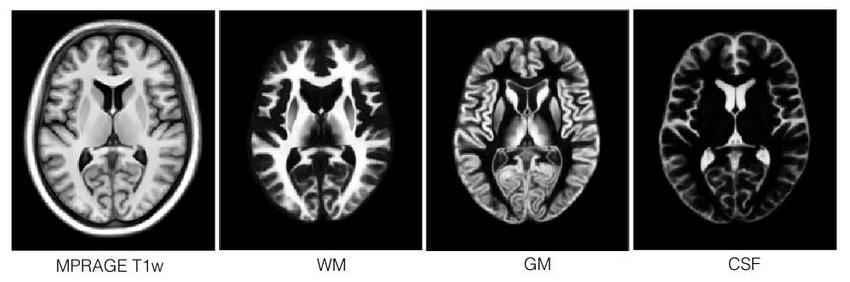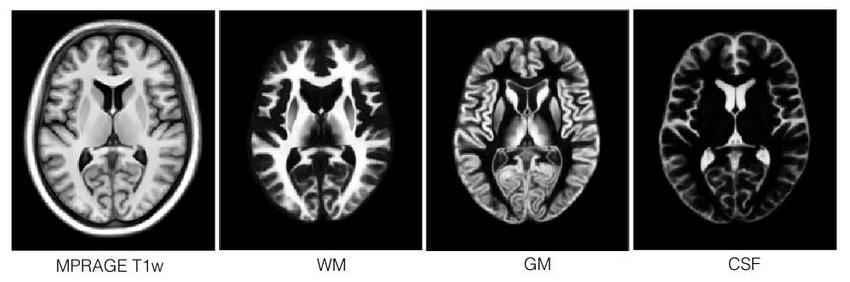
- Cerebrospinal Fluid (CSF)
    - "Cerebrospinal Fluid"는 뇌 및 척수 주위에 존재하는 뇌척수액
    - 뇌와 척수를 둘러싸고 있는 액체이며, MRI 이미지에서는 어두운 영역으로 나타님

- White Matter
    - "White Matter"는 뇌의 백질
    - 뇌의 신경 섬유와 연결된 부분으로, MRI 이미지에서는 중간 정도의 밝은 영역으로 나타남

- Gray Matter
    - "Gray Matter"는 뇌의 회질
    - 뇌의 신경 세포 체질이 집중된 부분으로, MRI 이미지에서는 어두운 영역으로 나타남

In [15]:
# tissue segmentation
image = registered_img_ants
mask = brain_mask_ants
classification = ants.atropos(a=image, m='[0.1, 1x1x1]', c='[5,0]', i='kmeans[3]', x=mask)
segmentation = classification['segmentation']

# tissue 유형별로 마스크 분리
for tissue_type in range(1, 4): # tissue_type은 csf, wm, gm로 1~3번 Mapping
    tissue_mask = segmentation == tissue_type
    if tissue_type == 2:
        print("=" * 20, " Gray Matter", "=" * 20)
    elif tissue_type == 3:
        print("=" * 20, " White Matter", "=" * 20)
    else: 
        print("=" * 20, " CSF",  "=" * 20)
    tissue_mask_image = ants.from_numpy(tissue_mask.numpy(), origin=image.origin, spacing=image.spacing)
    explore_3D_array(tissue_mask_image.numpy())

====================  CSF ====================


interactive(children=(IntSlider(value=90, description='SLICE', max=181), Output()), _dom_classes=('widget-inte…

====================  Gray Matter ====================


interactive(children=(IntSlider(value=90, description='SLICE', max=181), Output()), _dom_classes=('widget-inte…

====================  White Matter ====================


interactive(children=(IntSlider(value=90, description='SLICE', max=181), Output()), _dom_classes=('widget-inte…

### Region extraction using Atlas
- Atlas(Brain map) 사용
- 다양한 Atlas 존재 (https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/Atlases)
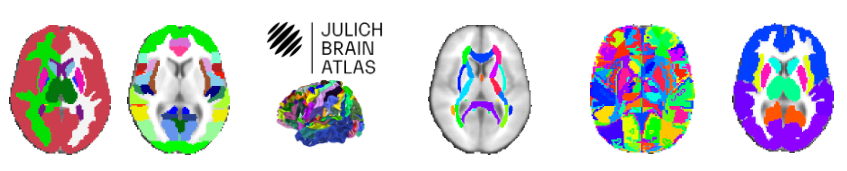

In [ ]:
# atlas template load
    # MNI structural atlas: basis functions 9 anatomical structural regions
atlas_template_path = '/media/leelabsg-storage1/yein/research/data/template/MNI-maxprob-thr0-1mm.nii.gz'

transformation = ants.registration(
    fixed=image, # registered_img_ants
    moving=ants.image_read(atlas_template_path), 
    type_of_transform='SyN'
    # outprefix=tmp_path # temp file path
)
registered_atlas_ants = transformation['warpedmovout']

regions = {1: 'caudate', 2: 'cerebellum', 3: 'frontal_lobe', 4: 'insula', 5: 'occipital_lobe', 6: 'parietal_lobe', 7: 'putamen', 8: 'temporal_lobe', 9: 'thalasmus'}
for region_idx in range(1, 10):
    print("=" * 20, regions[region_idx], "=" * 20)
    region_mask = registered_atlas_ants == region_idx
    region_mask_dilated = ants.morphology(region_mask, radius=4, operation='dilate', mtype='binary')
    extracted_region = image.numpy() * region_mask_dilated.numpy()

    explore_3D_array(extracted_region)
    # explore_3D_array(region_mask_dilated.numpy()) 

==================== caudate ====================


interactive(children=(IntSlider(value=90, description='SLICE', max=181), Output()), _dom_classes=('widget-inte…

==================== cerebellum ====================


interactive(children=(IntSlider(value=90, description='SLICE', max=181), Output()), _dom_classes=('widget-inte…

==================== frontal_lobe ====================


interactive(children=(IntSlider(value=90, description='SLICE', max=181), Output()), _dom_classes=('widget-inte…

==================== insula ====================


interactive(children=(IntSlider(value=90, description='SLICE', max=181), Output()), _dom_classes=('widget-inte…

# UKBB MRI relevant metadata

In [ ]:
# Disease metadata
disease = pd.read_csv('/media/leelabsg-storage1/DATA/UKBB/brain_age/PEDMASTER_ALL_20180514.txt', sep='\t')
disease

In [ ]:
# CSV Data Relevant to Brain Age Estimation Study
    # Note: Currently, there is no complete metadata for the entire UK Biobank MRI dataset. 
    # This CSV file is based on the approach described here: [Brain-Aging GitHub Repository](https://github.com/Flumenlucidum/Brain-Aging/blob/main/3D_CNN.py).
df = pd.read_csv('/media/leelabsg-storage1/yein/research/data/csv/ukbb_35012.csv')
df

In [ ]:
# healthy group
df[df['disease'] == 0] 

In [ ]:
# disease group
df[df['disease'] == 1] 